In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import joblib

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv(r'C:\Users\Vishrutha\AppData\Local\Temp\Temp1_ibm-hr-analytics-employee-attrition-performance.zip\WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
df.shape

(1470, 35)

# CORRELATION

In [7]:
df.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


# VISUALIZATION TECHNIQUES

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'DailyRate'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>, ...,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, ...,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, ...,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       ...,
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, ...,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, ...,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, ...,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

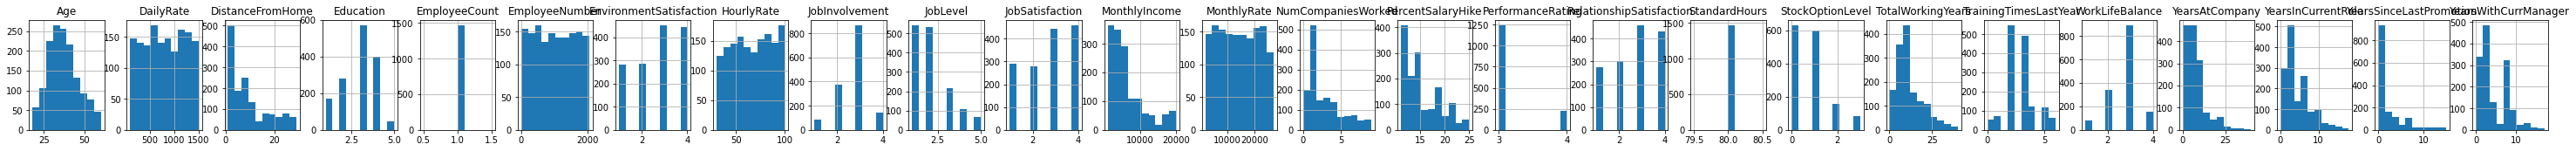

In [8]:
df.hist(figsize=(100,150),grid=True,layout=(50,50))

<AxesSubplot:>

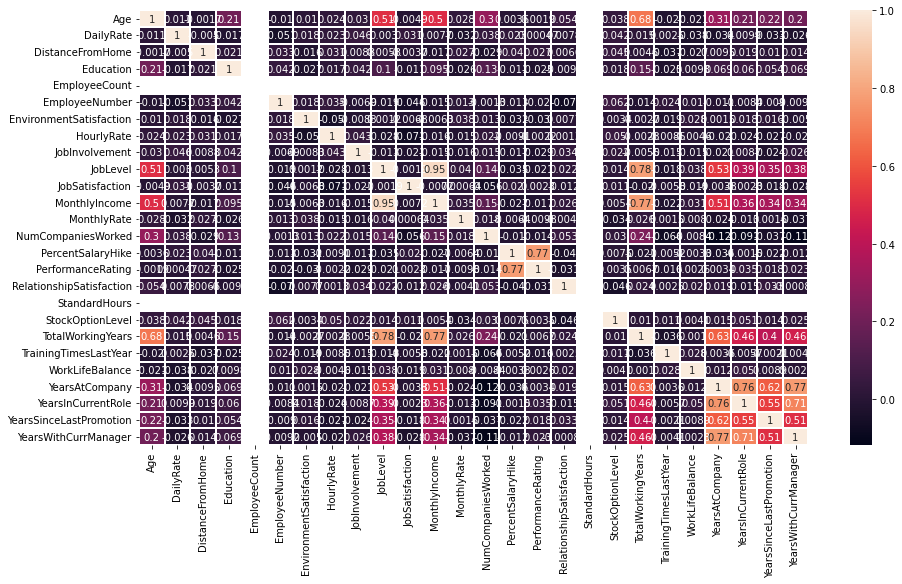

In [9]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,linecolor='white',linewidths=.25)

<AxesSubplot:xlabel='Attrition', ylabel='count'>

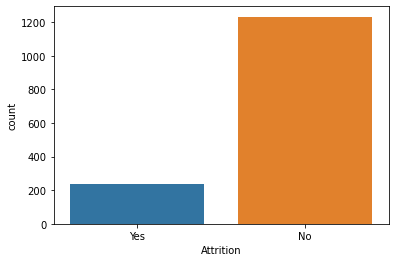

In [10]:
sns.countplot(x ='Attrition',
              data = df)

In [11]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# OUTLIERS

<AxesSubplot:xlabel='Attrition', ylabel='MonthlyIncome'>

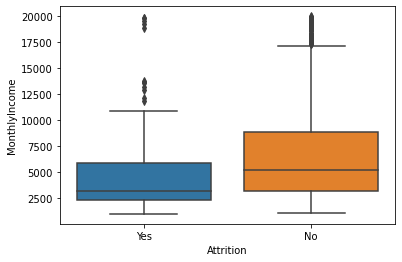

In [12]:
sns.boxplot(y ='MonthlyIncome',
            x ='Attrition',
            data = df)

In [13]:
df.shape

(1470, 35)

In [14]:
df.drop('EmployeeCount',axis = 1,inplace = True)
df.drop('StandardHours',axis = 1,inplace = True)
df.drop('EmployeeNumber',axis = 1, inplace = True)
df.drop('Over18',axis = 1,inplace = True)
 
print(df.shape)

(1470, 31)


In [15]:
y = df.iloc[:, 1]
X = df
 
X.drop('Attrition',axis = 1,inplace = True)

# LABEL ENCODING

In [16]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y = lb.fit_transform(y)

In [17]:
df.head(5)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,...,3,1,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,...,4,4,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,...,3,2,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,...,3,3,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,...,3,4,1,6,3,3,2,2,2,2


In [18]:
dum_Bus = pd.get_dummies(df['BusinessTravel'],prefix ='BusinessTravel')
 
dum_Dep = pd.get_dummies(df['Department'],prefix ='Department')
 
dum_Edu = pd.get_dummies(df['EducationField'],prefix ='EducationField')
 
dum_Gen = pd.get_dummies(df['Gender'],prefix ='Gender', drop_first = True)
 
dum_JRole = pd.get_dummies(df['JobRole'],prefix ='JobRole')
 
dum_Mar = pd.get_dummies(df['MaritalStatus'],prefix ='MaritalStatus')
 
dum_Ovet = pd.get_dummies(df['OverTime'],prefix ='OverTime', drop_first = True)

In [19]:
df.head(5)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,...,3,1,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,...,4,4,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,...,3,2,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,...,3,3,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,...,3,4,1,6,3,3,2,2,2,2


# Adding dummies values to x and removing the categorial data

In [20]:
X = pd.concat([X, dum_Bus, dum_Dep,
              dum_Edu, dum_Gen, dum_JRole,
              dum_Mar, dum_Ovet], axis = 1)
 
X.drop(['BusinessTravel', 'Department', 'EducationField',
       'Gender', 'JobRole', 'MaritalStatus', 'OverTime'],
       axis = 1, inplace = True)
 
print(X.shape)
print(y.shape)

(1470, 49)
(1470,)


# Preprocessing Techniques

In [21]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 40)

In [22]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
 
rf = RandomForestClassifier(n_estimators=10,
                            criterion='entropy')
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
 
def print_score(clf, X_train, y_train,
                X_test, y_test,
                train=True):
 
    if train:
        print("Train Result:")
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))
        res = cross_val_score(clf, X_train, y_train,cv=10, scoring='accuracy')
 
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        print("*-------*--------*------*---------*-------*--------*--------*")
 
    elif train == False:
 
        print("Test Result:")
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))
 
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("*-------*--------*-------*---------*----------*--------*---------*")
 
print_score(rf,X_train,y_train,X_test, y_test,train=True)
 
print_score(rf, X_train, y_train,X_test, y_test,train=False)

Train Result:
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       922
           1       1.00      0.87      0.93       180

    accuracy                           0.98      1102
   macro avg       0.99      0.94      0.96      1102
weighted avg       0.98      0.98      0.98      1102


Confusion Matrix: 
 [[922   0]
 [ 23 157]]

Average Accuracy: 	 0.8367
Accuracy SD: 		 0.0158
*-------*--------*------*---------*-------*--------*--------*
Test Result:
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       311
           1       0.70      0.12      0.21        57

    accuracy                           0.86       368
   macro avg       0.78      0.56      0.56       368
weighted avg       0.84      0.86      0.81       368


Confusion Matrix: 
 [[308   3]
 [ 50   7]]

accuracy score: 0.8560

*-------*--------*-------*---------*-------

# CROSS VALIDATION

In [23]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(X)
X=pd.DataFrame(X,columns=X.columns)

In [24]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
model=[DecisionTreeClassifier(),KNeighborsClassifier()]
max_accuracy_score=0
for r_state in range(40,90):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 40)
    for i_c in model:
        i_c.fit(X_train,y_train)
        pred=i_c.predict(X_test)
        ac_score=accuracy_score(y_test,pred)
        print("Accuracy state",r_state,'is',ac_score)
        if ac_score > max_accuracy_score:
            max_accuracy_score=ac_score
            final_state=r_state
            final_model=i_c
           
print()
print()
print()
print()
print('Maximum Accuracy score',final_state,'is',max_accuracy_score,'modelis',final_model)

Accuracy state 40 is 0.7717391304347826
Accuracy state 40 is 0.8016304347826086
Accuracy state 41 is 0.7608695652173914
Accuracy state 41 is 0.8016304347826086
Accuracy state 42 is 0.7690217391304348
Accuracy state 42 is 0.8016304347826086
Accuracy state 43 is 0.779891304347826
Accuracy state 43 is 0.8016304347826086
Accuracy state 44 is 0.7608695652173914
Accuracy state 44 is 0.8016304347826086
Accuracy state 45 is 0.7554347826086957
Accuracy state 45 is 0.8016304347826086
Accuracy state 46 is 0.7554347826086957
Accuracy state 46 is 0.8016304347826086
Accuracy state 47 is 0.7744565217391305
Accuracy state 47 is 0.8016304347826086
Accuracy state 48 is 0.7608695652173914
Accuracy state 48 is 0.8016304347826086
Accuracy state 49 is 0.7717391304347826
Accuracy state 49 is 0.8016304347826086
Accuracy state 50 is 0.7635869565217391
Accuracy state 50 is 0.8016304347826086
Accuracy state 51 is 0.7608695652173914
Accuracy state 51 is 0.8016304347826086
Accuracy state 52 is 0.7744565217391305
A